<a href="https://colab.research.google.com/github/adriendod/Self-Driving-Car/blob/master/Self_Driving_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!rm -Rf Track
!git clone https://github.com/adriendod/Self-Driving-Car

Cloning into 'Self-Driving-Car'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 496 (delta 0), reused 4 (delta 0), pack-reused 491
Receiving objects: 100% (496/496), 62.31 MiB | 33.78 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import random
from PIL import Image


Using TensorFlow backend.


In [0]:
datadir = 'Self-Driving-Car/Training Data/'
columns = ["capture", "direction"]
data = pd.read_csv(os.path.join(datadir,'drive_log.csv'))
#data.replace({'left': -1, 'straight': 0, 'right': 1}, inplace=True)
data.head()



,File name,Driving direction
0,capture 0.jpg,0
1,capture 1.jpg,1
2,capture 2.jpg,-1
3,capture 3.jpg,0
4,capture 4.jpg,1


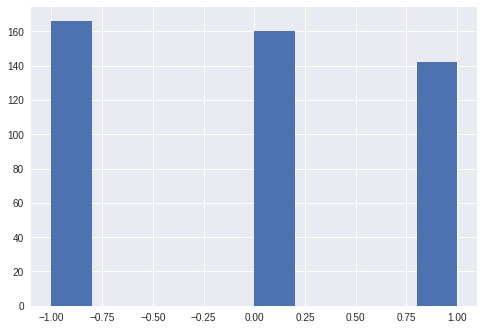

In [0]:
plt.hist(data['Driving direction'])
plt.show()

In [0]:
def load_img(datadir, data):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    image = indexed_data[0]
    image_path.append(os.path.join(datadir, image.strip()))
    steering.append(indexed_data[1])
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings
  
image_paths, steerings = load_img(datadir, data)
    

In [0]:
X_train, X_test, y_train, y_test = train_test_split(image_paths, steerings,test_size = 0.2, random_state = 42)
print('Training Samples: {}\nTest Samples: {}'.format(len(X_train), len(X_test)))

Training Samples: 374
Test Samples: 94


In [0]:
def img_preprocess(img):
  img = mpimg.imread(img)
  img = img[250:480, :,: ]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3,3), 0)
  img = cv2.resize(img, (200,66))
  img = img/255
  return img


Text(0.5, 1.0, 'Preprocessed image')

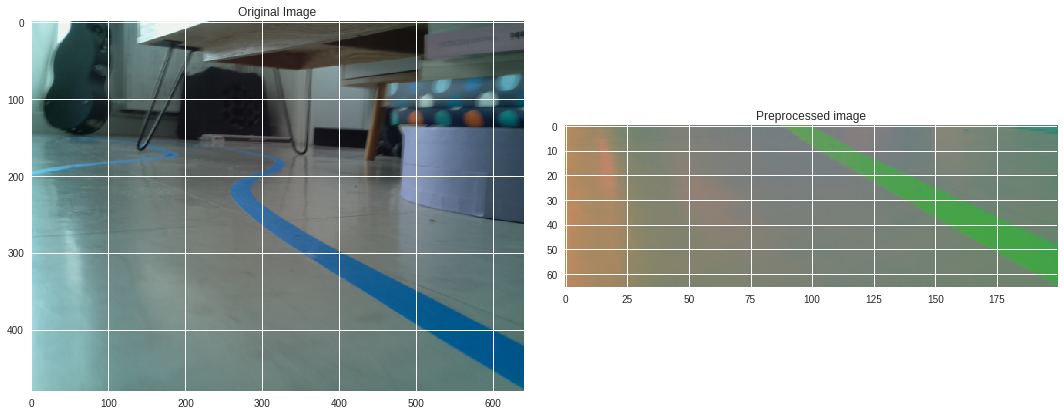

In [0]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)
fig, ax = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()
ax[0].imshow(original_image)
ax[0].set_title("Original Image")
ax[1].imshow(preprocessed_image)
ax[1].set_title("Preprocessed image")

In [0]:
X_train = np.array(list(map(img_preprocess, X_train)))
X_test = np.array(list(map(img_preprocess, X_test)))

-1
(374, 66, 200, 3)


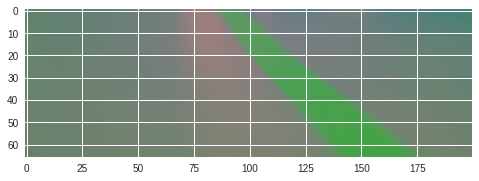

In [0]:
random_number = random.randint(0, len(X_train))
plt.imshow(X_train[random_number])
print (y_train[random_number])
print(X_train.shape)

In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, 5, 5, subsample=(2,2), input_shape = (66, 200, 3), activation='elu'))
  model.add(Convolution2D(36, 5, 5, subsample=(2,2), activation='elu'))
  model.add(Convolution2D(48, 5, 5, subsample=(2,2), activation='elu'))
  model.add(Convolution2D(64, 3, 3, activation='elu'))
  model.add(Convolution2D(64, 3, 3, activation='elu'))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(100, activation='elu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(50, activation='elu'))
  model.add(Dense(10, activation='elu'))
  model.add(Dense(1))
  
  optimizer = Adam(lr = 1e-3)
  model.compile(loss = 'mse', optimizer=optimizer)
  return model

In [0]:
model = nvidia_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), act

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 18, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
__________

In [0]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_test, y_test), batch_size = 100, verbose = 1, shuffle = 1)

Instructions for updating:
Use tf.cast instead.
Train on 374 samples, validate on 94 samples
Epoch 1/30
374/374 [==============================] - 5s 15ms/step - loss: 2.1926 - val_loss: 2.6261
Epoch 2/30
374/374 [==============================] - 0s 777us/step - loss: 1.4150 - val_loss: 0.6096
Epoch 3/30
374/374 [==============================] - 0s 711us/step - loss: 0.8122 - val_loss: 0.7066
Epoch 4/30
374/374 [==============================] - 0s 713us/step - loss: 0.7107 - val_loss: 0.6042
Epoch 5/30
374/374 [==============================] - 0s 729us/step - loss: 0.7279 - val_loss: 0.6261
Epoch 6/30
374/374 [==============================] - 0s 718us/step - loss: 0.6664 - val_loss: 0.5842
Epoch 7/30
374/374 [==============================] - 0s 724us/step - loss: 0.7293 - val_loss: 0.5864
Epoch 8/30
374/374 [==============================] - 0s 709us/step - loss: 0.7039 - val_loss: 0.5510
Epoch 9/30
374/374 [==============================] - 0s 722us/step - loss: 0.6452 - val_los

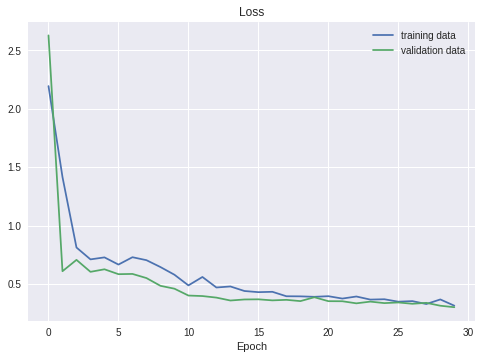

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training data', 'validation data'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.show()


In [0]:
model.save('model.h5')

In [0]:
from google.colab import files
files.download('model.h5')

In [0]:
random_number = random.randint(0, len(X_test))
image = X_test[random_number]
print(image.shape)
image = image.reshape(1,66,200,3)
print(model.predict(image))
print (y_test[random_number])
plt.imshow(X_test[random_number])

if model.predict(image) > 0.3 :
  print("Tournez a droite")
elif model.predict(image) < -0.3 :
  print("Tournez a gauche")
else :
  print("Allez tout droit")



NameError: ignored